#### Import python files from another directory
In order to reuse code written in .py files you need to import them.
If they are from a distant folder, rather than copy-paste it into the current folder, you can write:

In [1]:
import sys

sys.path.append(
    "/Users/gregoirepachebat/Desktop/ML_course/labs/ex02"
)  # This goes up twice in the directories tree (hence in labs)
# then goes down to ex02/template where your files from lab 2 are.
sys.path.append(
    "/Users/gregoirepachebat/Desktop/ML_course/labs/ex02/template"
)

sys.path.append("../..")


In [2]:
print(sys.path)
from ex02.template.grid_search import *

['/Users/gregoirepachebat/Desktop/ML_course/labs/ex03/template', '/Users/gregoirepachebat/anaconda3/lib/python311.zip', '/Users/gregoirepachebat/anaconda3/lib/python3.11', '/Users/gregoirepachebat/anaconda3/lib/python3.11/lib-dynload', '', '/Users/gregoirepachebat/anaconda3/lib/python3.11/site-packages', '/Users/gregoirepachebat/anaconda3/lib/python3.11/site-packages/aeosa', '/Users/gregoirepachebat/anaconda3/lib/python3.11/site-packages/se3_transformer-1.0.0-py3.11.egg', '/Users/gregoirepachebat/Documents/GitHub/RFdiffusion', '/Users/gregoirepachebat/Desktop/ML_course/labs/ex02', '/Users/gregoirepachebat/Desktop/ML_course/labs/ex02/template', '../..']


you can now import your desired files, for example, we can import grid_search.py with:

In [3]:
# You then need to call your functions using grid_search.function_name() # You can call any functions of the file with function_name()

# Let's try to call generate_w from grid_search.py:
w0, w1 = generate_w(5)
print(w0, w1)

[-100.  -25.   50.  125.  200.] [-150.  -75.    0.   75.  150.]


As you can see we are now able to call functions from the grid_search.py file.

In [4]:
# Useful starting lines
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from helpers import *

from test_utils import test

%load_ext autoreload
%autoreload 2

In [5]:
a =np.array([1,2])
print(a)

[1 2]


# 1 Least squares and linear basis functions models
## 1.1 Least squares

In [6]:

def least_squares(y, tx):
    """Calculate the least squares solution.
       returns mse, and optimal weights.

    Args:
        y: numpy array of shape (N,), N is the number of samples.
        tx: numpy array of shape (N,D), D is the number of features.

    Returns:
        w: optimal weights, numpy array of shape(D,), D is the number of features.
        mse: scalar.

    >>> least_squares(np.array([0.1,0.2]), np.array([[2.3, 3.2], [1., 0.1]]))
    (array([ 0.21212121, -0.12121212]), 8.666684749742561e-33)
    """
    # ***************************************************
    # INSERT YOUR CODE HERE
    # least squares: TODO
    # returns mse, and optimal weights
    return np.linalg.solve(tx.T@tx, tx.T@y)
    # ***************************************************


### You can test your implementation here

In [7]:
test(least_squares)
# NB:
#
# Due to precision issues,
# the output might not be exactly the same
# even if you have implemented the right code.
#
# For example, the mse output expected to be
# 8.666684749742561e-33,
# but you might get some other small number
# close to zero.
#
# In this case,
# Failing the test doesn't necessarily mean
# your implementation is wrong.:)

❌ The are some issues with your implementation of `least_squares`:
**********************************************************************
File "__main__", line 13, in least_squares
Failed example:
    least_squares(np.array([0.1,0.2]), np.array([[2.3, 3.2], [1., 0.1]]))
Expected:
    (array([ 0.21212121, -0.12121212]), 8.666684749742561e-33)
Got:
    array([ 0.21212121, -0.12121212])
**********************************************************************


In [8]:
w0, w1 = generate_w(100)
print(w0)

[-100.          -96.96969697  -93.93939394  -90.90909091  -87.87878788
  -84.84848485  -81.81818182  -78.78787879  -75.75757576  -72.72727273
  -69.6969697   -66.66666667  -63.63636364  -60.60606061  -57.57575758
  -54.54545455  -51.51515152  -48.48484848  -45.45454545  -42.42424242
  -39.39393939  -36.36363636  -33.33333333  -30.3030303   -27.27272727
  -24.24242424  -21.21212121  -18.18181818  -15.15151515  -12.12121212
   -9.09090909   -6.06060606   -3.03030303    0.            3.03030303
    6.06060606    9.09090909   12.12121212   15.15151515   18.18181818
   21.21212121   24.24242424   27.27272727   30.3030303    33.33333333
   36.36363636   39.39393939   42.42424242   45.45454545   48.48484848
   51.51515152   54.54545455   57.57575758   60.60606061   63.63636364
   66.66666667   69.6969697    72.72727273   75.75757576   78.78787879
   81.81818182   84.84848485   87.87878788   90.90909091   93.93939394
   96.96969697  100.          103.03030303  106.06060606  109.09090909
  112.

### Load the data
Here we will reuse the dataset `height_weight_genders.csv` from previous exercise section to check the correctness of your implementation. Please compare it with your previous result.

In [9]:
def test_your_least_squares():
    """
    # this code should compare the optimal weights obtained
    # by least squares vs. grid search
    """
    height, weight, gender = load_data_from_ex02(sub_sample=False, add_outlier=False)
    x, mean_x, std_x = standardize(height)
    y, tx = build_model_data(x, weight)
    # ***************************************************
    # INSERT YOUR CODE HERE
    # least square or grid search: TODO
    # this code should compare the optimal weights obtained
    # by least squares vs. grid search
    w0, w1 = generate_w(100)
    grid_losses = grid_search(y, tx, w0,w1)
    best_loss = float("inf")
    best_loss, opt_w0, opt_w1 = get_best_parameters(w0, w1, grid_losses)
    
    print("best grid search parameters = ", opt_w0, ",", opt_w1)
    print('best loss = ', best_loss)

    w = least_squares(y, tx)
    loss = compute_loss(y, tx, w)
    print('w least square = ', w)
    print("least_squares lost = ", loss)
    
    # ***************************************************


Test it here

In [10]:
test_your_least_squares()

best grid search parameters =  72.72727272727272 , 13.636363636363626
best loss =  311174.06737219065
w least square =  [73.293922   13.47971243]
least_squares lost =  307717.75737658807


## 1.2 Least squares with a linear basis function model
Start from this section, we will use the dataset `dataEx3.csv`.

### Implement polynomial basis functions

In [11]:
# load dataset
x, y = load_data()
print("shape of x {}".format(x.shape))
print("shape of y {}".format(y.shape))

shape of x (50,)
shape of y (50,)


In [12]:
def build_poly(x, degree):
    """polynomial basis functions for input data x, for j=0 up to j=degree.

    Args:
        x: numpy array of shape (N,), N is the number of samples.
        degree: integer.

    Returns:
        poly: numpy array of shape (N,d+1)

    >>> build_poly(np.array([0.0, 1.5]), 2)
    array([[1.  , 0.  , 0.  ],
           [1.  , 1.5 , 2.25]])
    """
    # ***************************************************
    # INSERT YOUR CODE HERE
    # polynomial basis function: TODO
    # this function should return the matrix formed
    # by applying the polynomial basis to the input data
    return np.vstack([x**d for d in range(degree+1)]).T

    # ***************************************************


In [13]:
build_poly(np.array([0.0, 1.5]), 2)


array([[1.  , 0.  , 0.  ],
       [1.  , 1.5 , 2.25]])

In [14]:
test(build_poly)

✅ Your `build_poly` passed 1 tests.


Once your implementation of `build_poly` passes the test, copy it to `build_polynomial.py`
Let us play with polynomial regression. Note that we will use your implemented function `compute_mse`. Please copy and paste your implementation from exercise02.

In [15]:
from plots import *


def polynomial_regression():
    """Constructing the polynomial basis function expansion of the data,
    and then running least squares regression."""
    # define parameters
    degrees = [1, 3, 7, 12]

    # define the structure of the figure
    num_row = 2
    num_col = 2
    f, axs = plt.subplots(num_row, num_col)

    for ind, degree in enumerate(degrees):
        # ***************************************************
        # INSERT YOUR CODE HERE
        # form the data to do polynomial regression.: TODO
        x_ = build_poly(x, degree)
        
        # ***************************************************
        
        # ***************************************************
        # INSERT YOUR CODE HERE
        # least square and calculate RMSE: TODO
        weights = least_squares(y, x_)
        
        rmse = np.sqrt(2* compute_loss(y, x_, weights))
        # ***************************************************

        print(
            "Processing {i}th experiment, degree={d}, rmse={loss}".format(
                i=ind + 1, d=degree, loss=rmse
            )
        )
        # plot fit
        plot_fitted_curve(y, x, weights, degree, axs[ind // num_col][ind % num_col])
    plt.tight_layout()

    plt.show()

Run polynomial regression

Processing 1th experiment, degree=1, rmse=4.718760796342188
Processing 2th experiment, degree=3, rmse=2.585827766773748
Processing 3th experiment, degree=7, rmse=2.4965870360907285
Processing 4th experiment, degree=12, rmse=2.4339788393311803


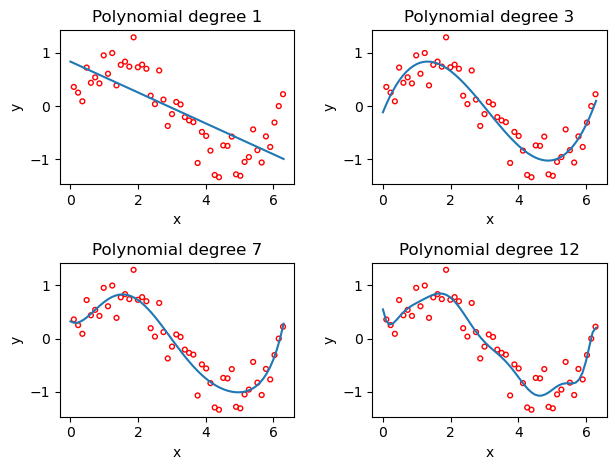

In [16]:
polynomial_regression()

Your results should look like this:

![alt text](visualize_polynomial_regression.png)

# 2 Evaluating model predication performance

Let us show the train and test splits for various polynomial degrees. First of all, please fill in the function `split_data()`

In [17]:
def split_data(x, y, ratio, seed=1):
    """
    split the dataset based on the split ratio. If ratio is 0.8
    you will have 80% of your data set dedicated to training
    and the rest dedicated to testing. If ratio times the number of samples is not round
    you can use np.floor. Also check the documentation for np.random.permutation,
    it could be useful.

    Args:
        x: numpy array of shape (N,), N is the number of samples.
        y: numpy array of shape (N,).
        ratio: scalar in [0,1]
        seed: integer.

    Returns:
        x_tr: numpy array containing the train data.
        x_te: numpy array containing the test data.
        y_tr: numpy array containing the train labels.
        y_te: numpy array containing the test labels.

    >>> split_data(np.arange(13), np.arange(13), 0.8, 1)
    (array([ 2,  3,  4, 10,  1,  6,  0,  7, 12,  9]), array([ 8, 11,  5]), array([ 2,  3,  4, 10,  1,  6,  0,  7, 12,  9]), array([ 8, 11,  5]))
    """
    # set seed
    np.random.seed(seed)
    # ***************************************************
    # INSERT YOUR CODE HERE
    # split the data based on the given ratio: TODO
    indices = np.arange(x.shape[0])
    np.random.shuffle(indices)
    
    # Split the indices based on the ratio
    split_idx = int(ratio * len(indices))
    train_indices = indices[:split_idx]
    test_indices = indices[split_idx:]
    
    # Use the indices to split the data
    x_train, x_test = x[train_indices], x[test_indices]
    y_train, y_test = y[train_indices], y[test_indices]
    
    return x_train, x_test, y_train, y_test


In [18]:
test(split_data)

✅ Your `split_data` passed 1 tests.


Then, test your `split_data` function below.

In [19]:
def train_test_split_demo(x, y, degree, ratio, seed):
    """polynomial regression with different split ratios and different degrees.

    Returns:
      x_tr: numpy array
      x_te: numpy array
      y_tr: numpy array
      y_te: numpy array
      weights: weights from the least squares optimization"""
    # ***************************************************
    # INSERT YOUR CODE HERE
    # split the data, and return train and test data: TODO
    x_train, x_test, y_train, y_test = split_data(x,y,ratio, seed)
    # ***************************************************
    
    # ***************************************************
    # INSERT YOUR CODE HERE
    # form train and test data with polynomial basis function: TODO
    phi_x_train = build_poly(x_train,degree)
    phi_x_test = build_poly(x_test, degree)
    # ***************************************************

    # ***************************************************
    # INSERT YOUR CODE HERE
    # calculate weight through least square: TODO
    weight = least_squares(y_train, phi_x_train)
    # ***************************************************
    
    # ***************************************************
    # INSERT YOUR CODE HERE
    # calculate RMSE for train and test data,
    # and store them in rmse_tr and rmse_te respectively: TODO
    rmse_tr = compute_loss(y_train, phi_x_train, weight)
    rmse_te = compute_loss(y_test, phi_x_test, weight)

    # ***************************************************
    
    print(
        "proportion={p}, degree={d}, Training RMSE={tr:.3f}, Testing RMSE={te:.3f}".format(
            p=ratio, d=degree, tr=rmse_tr, te=rmse_te
        )
    )
    return x_train, x_test, y_train, y_test, weight

Demo time

proportion=0.9, degree=1, Training RMSE=10.973, Testing RMSE=0.164
proportion=0.9, degree=3, Training RMSE=3.142, Testing RMSE=0.213
proportion=0.9, degree=7, Training RMSE=2.899, Testing RMSE=0.241
proportion=0.9, degree=12, Training RMSE=2.632, Testing RMSE=0.306
proportion=0.7, degree=1, Training RMSE=9.323, Testing RMSE=1.854
proportion=0.7, degree=3, Training RMSE=2.172, Testing RMSE=1.428
proportion=0.7, degree=7, Training RMSE=1.811, Testing RMSE=1.665
proportion=0.7, degree=12, Training RMSE=1.735, Testing RMSE=1.614
proportion=0.5, degree=1, Training RMSE=5.168, Testing RMSE=7.044
proportion=0.5, degree=3, Training RMSE=1.424, Testing RMSE=2.197
proportion=0.5, degree=7, Training RMSE=1.349, Testing RMSE=2.018
proportion=0.5, degree=12, Training RMSE=1.052, Testing RMSE=69.574
proportion=0.1, degree=1, Training RMSE=0.914, Testing RMSE=12.835
proportion=0.1, degree=3, Training RMSE=0.036, Testing RMSE=9.517
proportion=0.1, degree=7, Training RMSE=0.000, Testing RMSE=251.216
pr

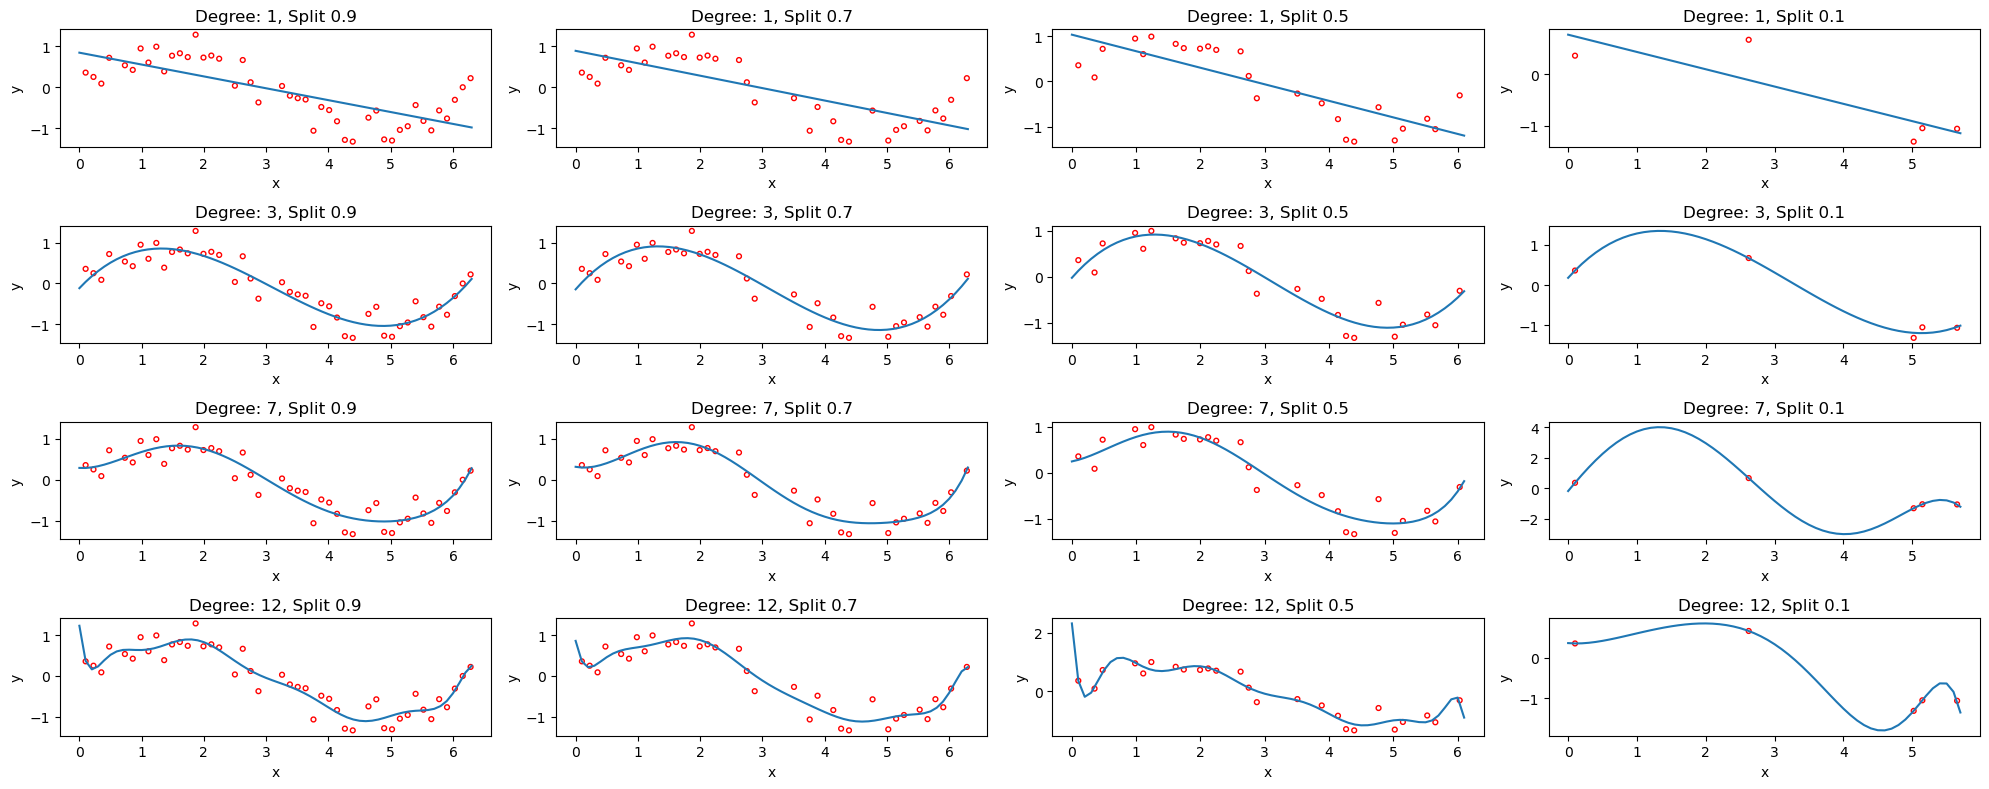

In [20]:
seed = 6
degrees = [1, 3, 7, 12]
split_ratios = [0.9, 0.7, 0.5, 0.1]

# define the structure of the figure
num_row = 4
num_col = 4
axs = plt.subplots(num_row, num_col, figsize=(20, 8))[1]

for ind, split_ratio in enumerate(split_ratios):
    for ind_d, degree in enumerate(degrees):
        x_tr, x_te, y_tr, y_te, w = train_test_split_demo(
            x, y, degree, split_ratio, seed
            )
        plot_fitted_curve(y_tr, x_tr, w, degree, axs[ind_d][ind % num_col])
        axs[ind_d][ind].set_title(f"Degree: {degree}, Split {split_ratio}")
plt.tight_layout()


Your graph should look like this:

![alt text](split_demo.png)

# Ridge Regression
Please fill in the function below.

In [21]:
def ridge_regression(y, tx, lambda_):
    """implement ridge regression.

    Args:
        y: numpy array of shape (N,), N is the number of samples.
        tx: numpy array of shape (N,D), D is the number of features.
        lambda_: scalar.

    Returns:
        w: optimal weights, numpy array of shape(D,), D is the number of features.

    >>> ridge_regression(np.array([0.1,0.2]), np.array([[2.3, 3.2], [1., 0.1]]), 0)
    array([ 0.21212121, -0.12121212])
    >>> ridge_regression(np.array([0.1,0.2]), np.array([[2.3, 3.2], [1., 0.1]]), 1)
    array([0.03947092, 0.00319628])
    """
    lambda_p = 2 * tx.shape[0] * lambda_
    txT_tx = tx.T @ tx + lambda_p * np.identity(tx.shape[1])
    return np.linalg.solve(txT_tx, tx.T@y)

In [22]:
test(ridge_regression)

✅ Your `ridge_regression` passed 2 tests.


In [23]:
def ridge_regression_demo(x, y, degree, ratio, seed):
    """ridge regression demo."""
    # define parameter
    lambdas = np.logspace(-5, 0, 15)

    # ***************************************************
    # INSERT YOUR CODE HERE
    # split the data, and return train and test data: TODO
    x_tr, x_te, y_tr, y_te = split_data(x, y, ratio, seed)
    # ***************************************************
    # ***************************************************
    # INSERT YOUR CODE HERE
    # form train and test data with polynomial basis function: TODO
    x_tr, x_te = build_poly(x_tr, degree), build_poly(x_te, degree)
    # ***************************************************
    

    rmse_tr = []
    rmse_te = []
    for ind, lambda_ in enumerate(lambdas):
        # ***************************************************
        # INSERT YOUR CODE HERE
        # ridge regression with a given lambda
        w = ridge_regression(y_tr, x_tr, lambda_)
        rmse_tr.append(np.sqrt(2*compute_loss(y_tr, x_tr,w)))
        rmse_te.append(np.sqrt(2*compute_loss(y_te,x_te,w)))
        # ***************************************************

        print(
            "proportion={p}, degree={d}, lambda={l:.3f}, Training RMSE={tr:.3f}, Testing RMSE={te:.3f}".format(
                p=ratio, d=degree, l=lambda_, tr=rmse_tr[ind], te=rmse_te[ind]
            )
        )
    plot_train_test(rmse_tr, rmse_te, lambdas, degree)

Demo time

proportion=0.5, degree=7, lambda=0.000, Training RMSE=1.607, Testing RMSE=2.387
proportion=0.5, degree=7, lambda=0.000, Training RMSE=1.607, Testing RMSE=2.384
proportion=0.5, degree=7, lambda=0.000, Training RMSE=1.607, Testing RMSE=2.379
proportion=0.5, degree=7, lambda=0.000, Training RMSE=1.608, Testing RMSE=2.372
proportion=0.5, degree=7, lambda=0.000, Training RMSE=1.611, Testing RMSE=2.364
proportion=0.5, degree=7, lambda=0.001, Training RMSE=1.615, Testing RMSE=2.356
proportion=0.5, degree=7, lambda=0.001, Training RMSE=1.621, Testing RMSE=2.329
proportion=0.5, degree=7, lambda=0.003, Training RMSE=1.628, Testing RMSE=2.258
proportion=0.5, degree=7, lambda=0.007, Training RMSE=1.642, Testing RMSE=2.135
proportion=0.5, degree=7, lambda=0.016, Training RMSE=1.673, Testing RMSE=1.999
proportion=0.5, degree=7, lambda=0.037, Training RMSE=1.740, Testing RMSE=1.950
proportion=0.5, degree=7, lambda=0.085, Training RMSE=1.870, Testing RMSE=2.107
proportion=0.5, degree=7, lambda=0.193, 

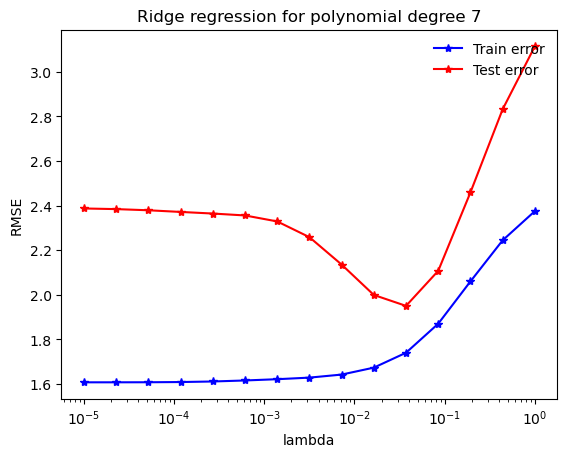

In [24]:
seed = 56
degree = 7
split_ratio = 0.5
ridge_regression_demo(x, y, degree, split_ratio, seed)


Your plot should look like:

![alt text](ridge_regression.png)